#Exercise 2: Visualization Tools 🐍📊

<p>Nama  = Reynhard Powiwi</p>
<p>Kelas = IF-44-PIL-DS01 📚👨‍🎓</p>

Import necessary library

In [69]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib as mpl
import matplotlib.pyplot as plt

Read the data

In [70]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [71]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [72]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [73]:
df_can.set_index('Country', inplace=True)
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,124,161,140,122,133,128,211,160,174,217


In [74]:
df_can.index.name = None

Add a 'Total' column

In [75]:
df_can['Total'] = df_can.sum(axis=1)

<ipython-input-75-8cd345a76c6e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [76]:
df_can.columns = list(map(str, df_can.columns))
year = list(map(str, range(1980, 2013)))

In [77]:
### type your answer here
df_china_india = df_can.loc[['China', 'India'], year]

df_china_india

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

In [78]:
# Transpose DataFrame

df_china_india = df_can.loc[['China', 'India'], year].transpose()

df_china_india



,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


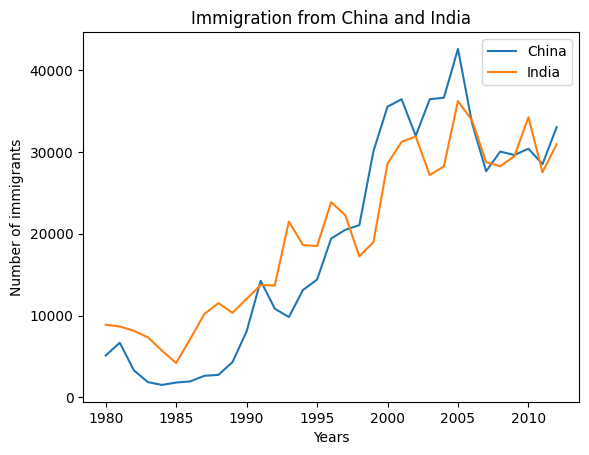

In [79]:
df_china_india.index = df_china_india.index.map(int) # let's change the index values of Haiti to type integer for plotting
df_china_india.plot(kind='line')

plt.title('Immigration from China and India')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Step 1: Get the data set for top 5 countries

In [90]:
### type your answer here
df_can_top5 = df_can.sort_values(by='Total', ascending=False, inplace=False).head().transpose()

df_can_top5




,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
Continent,Asia,Asia,Europe,Asia,Asia
Region,Southern Asia,Eastern Asia,Northern Europe,South-Eastern Asia,Southern Asia
DevName,Developing regions,Developing regions,Developed regions,Developing regions,Developing regions
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691


Step 2: Plot graph

In [91]:
### type your answer here
df_can_top5 = df_can_top5.loc[year]

df_can_top5



,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


Text(0.5, 1.0, 'Immigration Trend of Top 5 Countries')

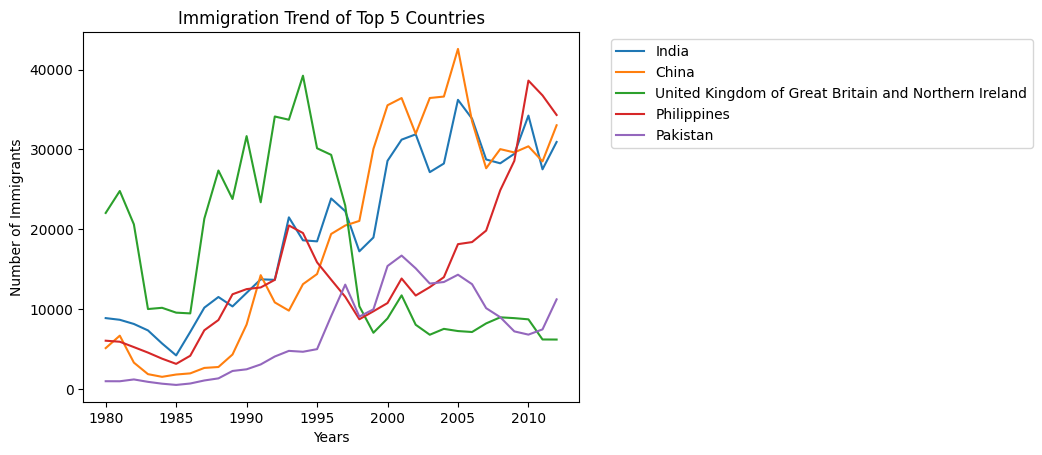

In [93]:
df_can_top5.plot(kind='line')

plt.xlabel("Years")
plt.ylabel("Number of Immigrants")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Immigration Trend of Top 5 Countries")


**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

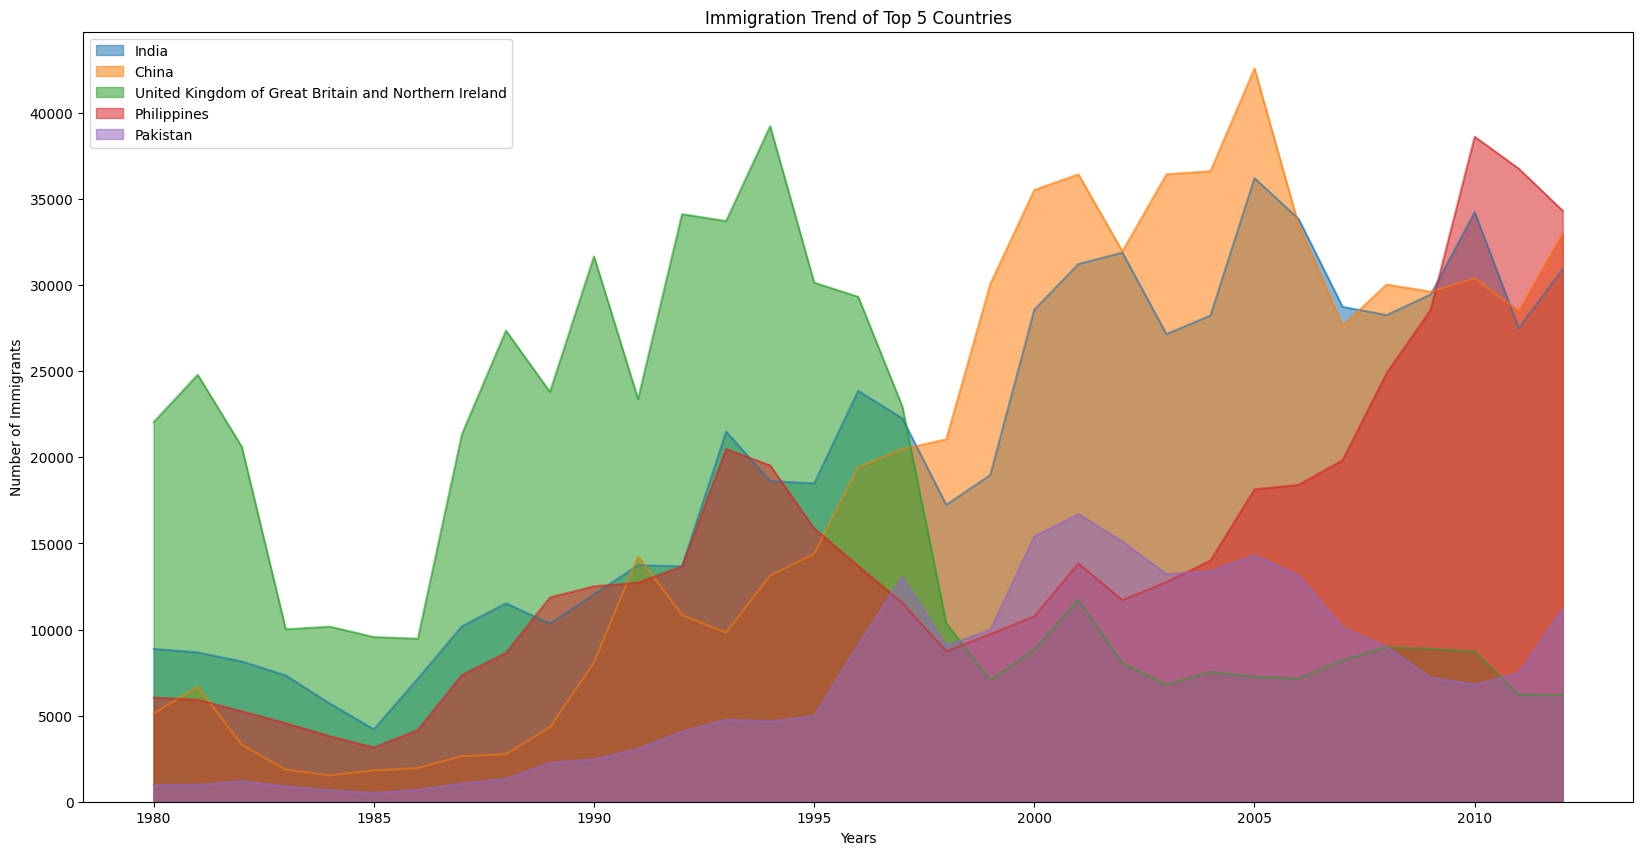

In [95]:
### type your answer here

df_can_top5.plot(kind='area',
             alpha=0.55, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [98]:
### type your answer here

df_GAB = df_can.loc[['Greece', 'Albania', 'Bulgaria'], year].transpose()

df_GAB


,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11
1985,584,0,24
1986,547,1,33
1987,765,2,52
1988,564,2,43
1989,773,3,85


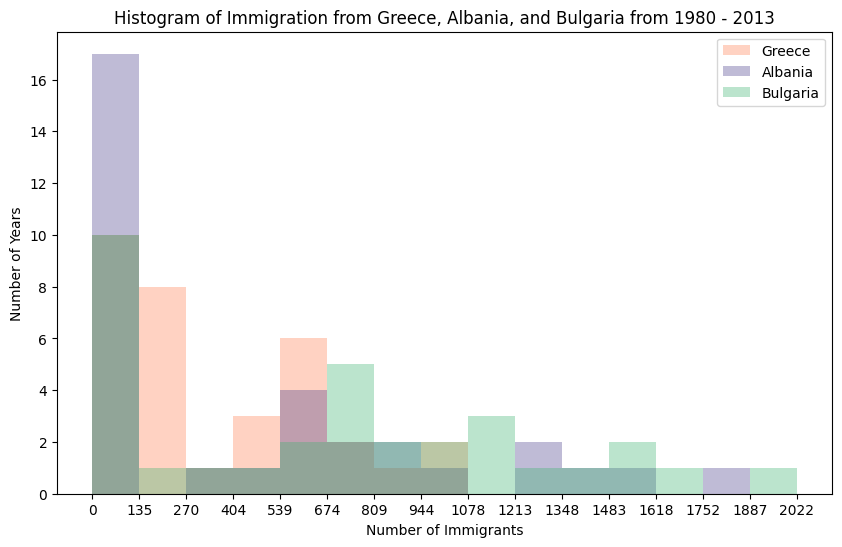

In [99]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_GAB, 15)

# un-stacked histogram
df_GAB.plot(kind ='hist',
          figsize=(10, 6),
          bins=15,
          alpha=0.35,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [101]:
### type your answer here

df_can_top15 = df_can.sort_values(by='Total', ascending=False, inplace=False).head(15)

df_can_top15 = df_can_top15['Total']
df_can_top15



India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
<!--    3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface. -->

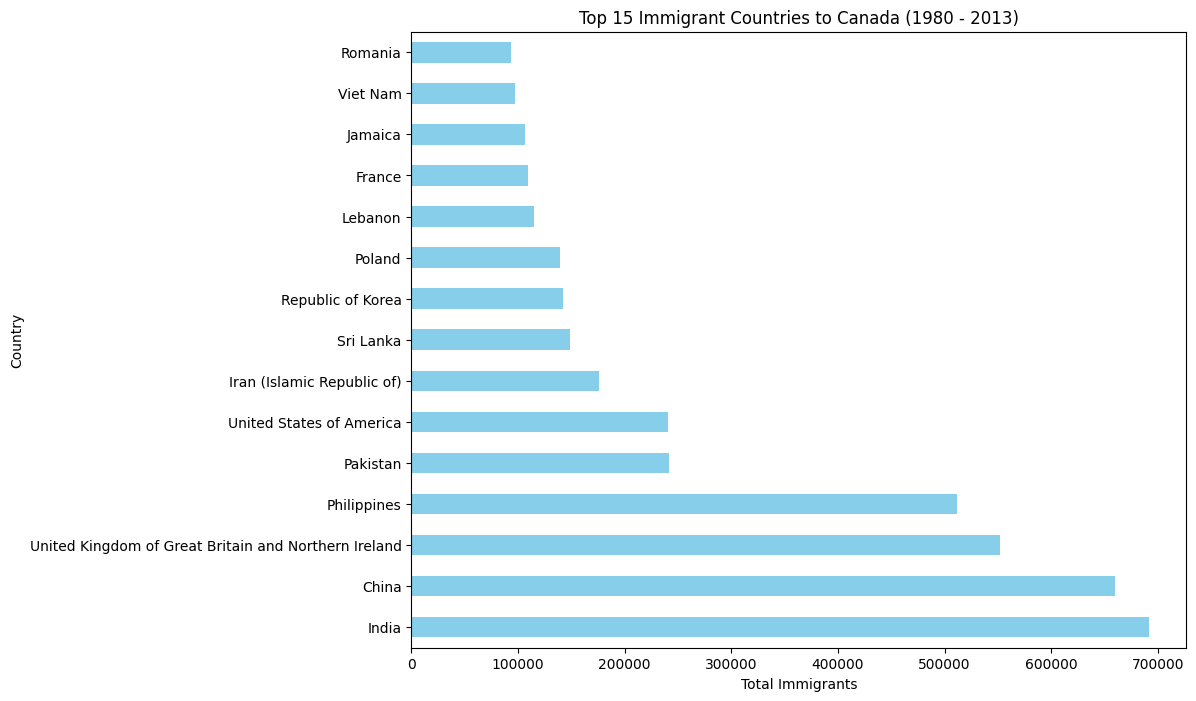

In [102]:
# Buat grafik batang horizontal
df_can_top15.plot(kind='barh', x='Country', y='Total', figsize=(10, 8), color='skyblue')

# Beri label sumbu dan judul
plt.xlabel('Total Immigrants')
plt.ylabel('Country')
plt.title('Top 15 Immigrant Countries to Canada (1980 - 2013)')

# Tampilkan plot
plt.show()





# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).